In [2]:
import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

data = sio.loadmat('AMZN_20141126.mat')

LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

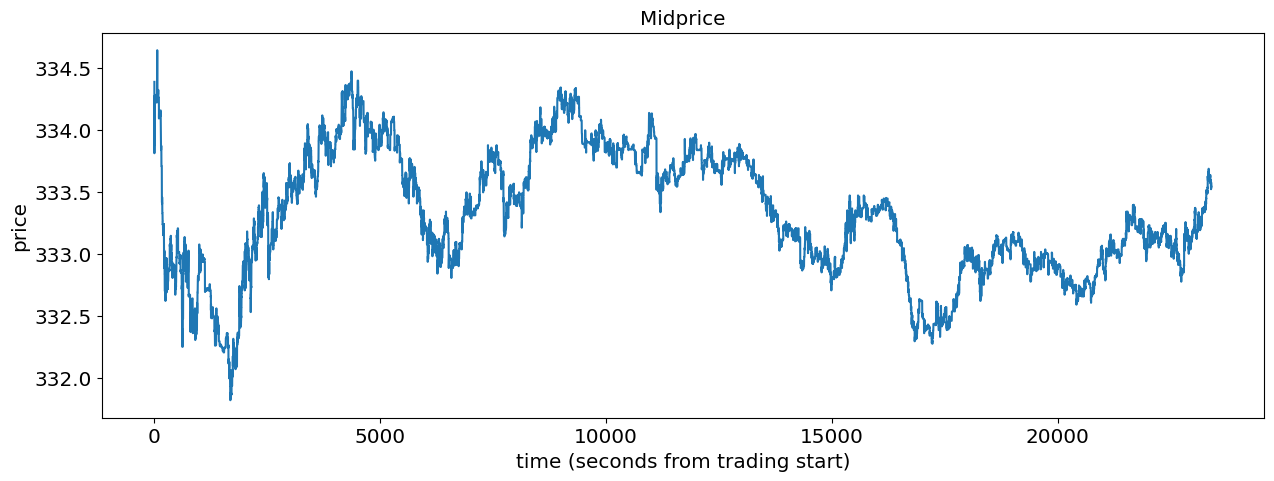

In [3]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

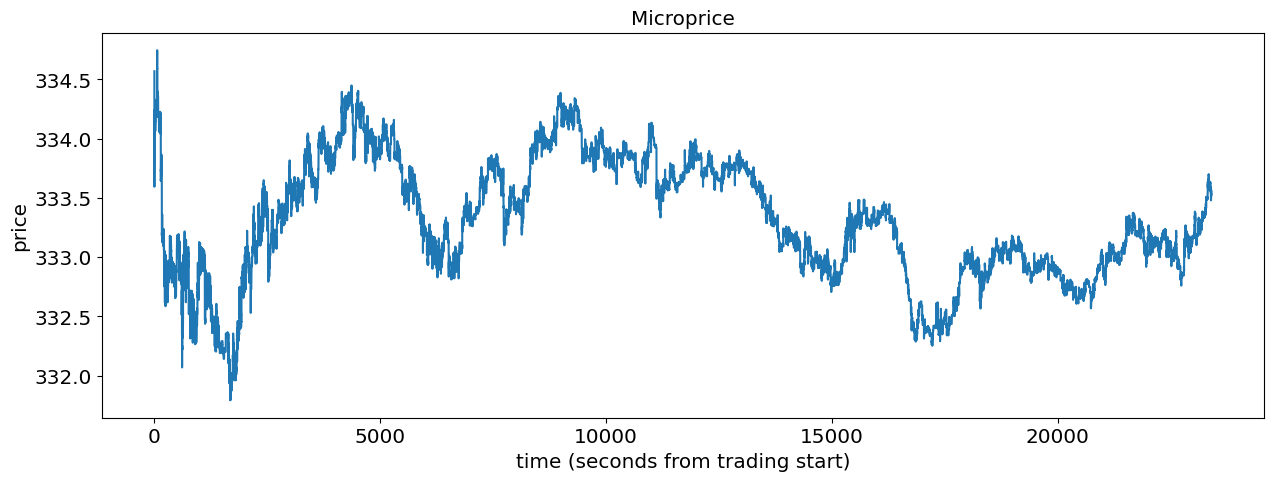

In [4]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

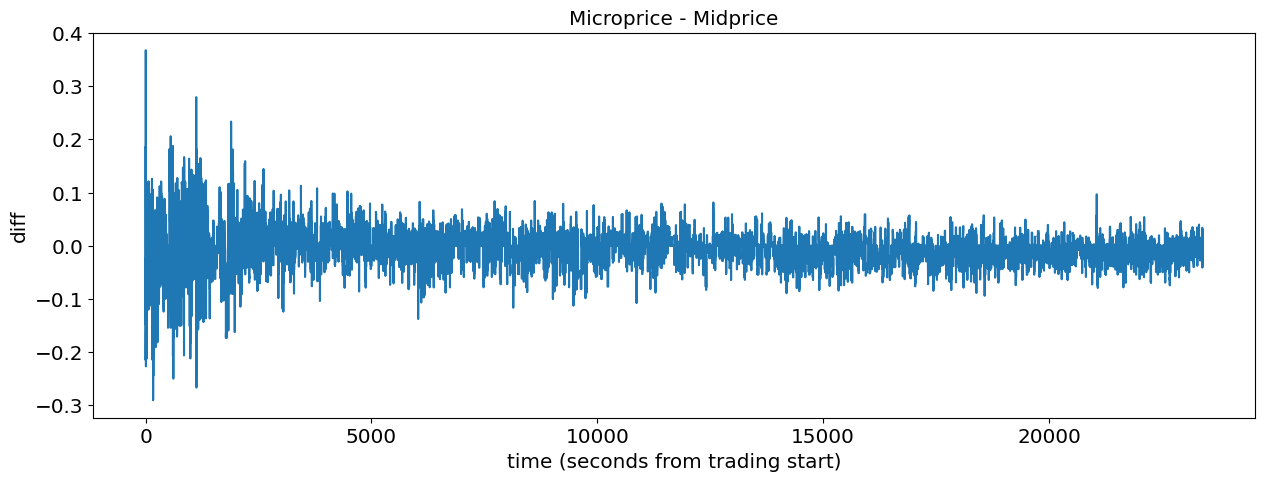

In [5]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

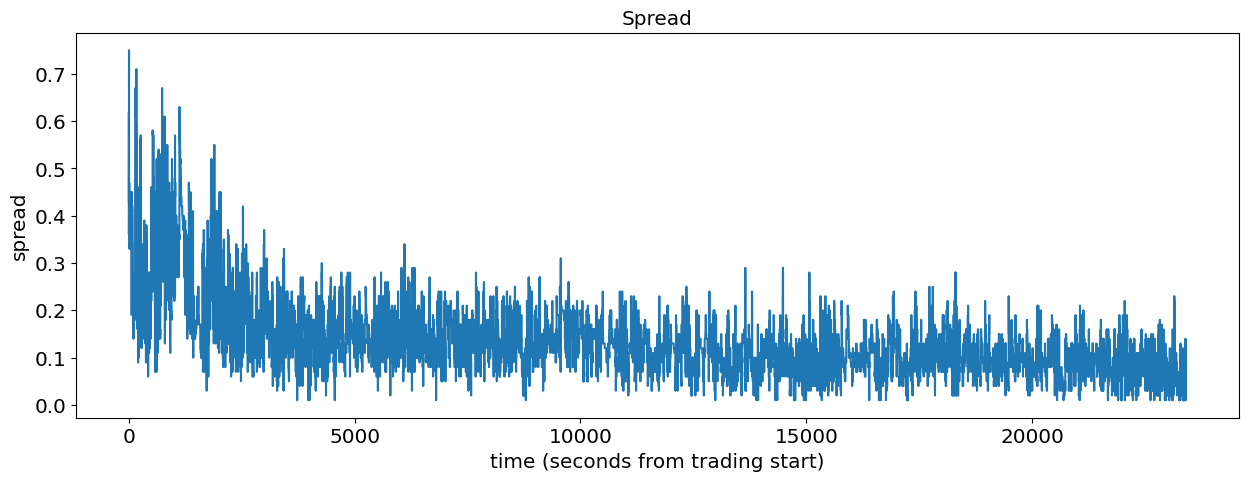

In [6]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

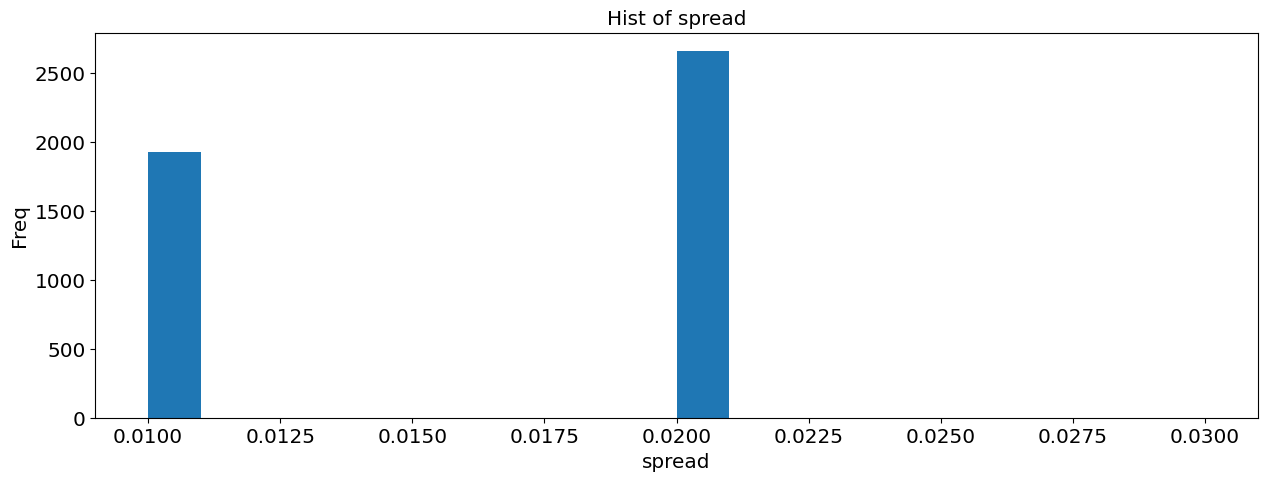

In [7]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

In [8]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

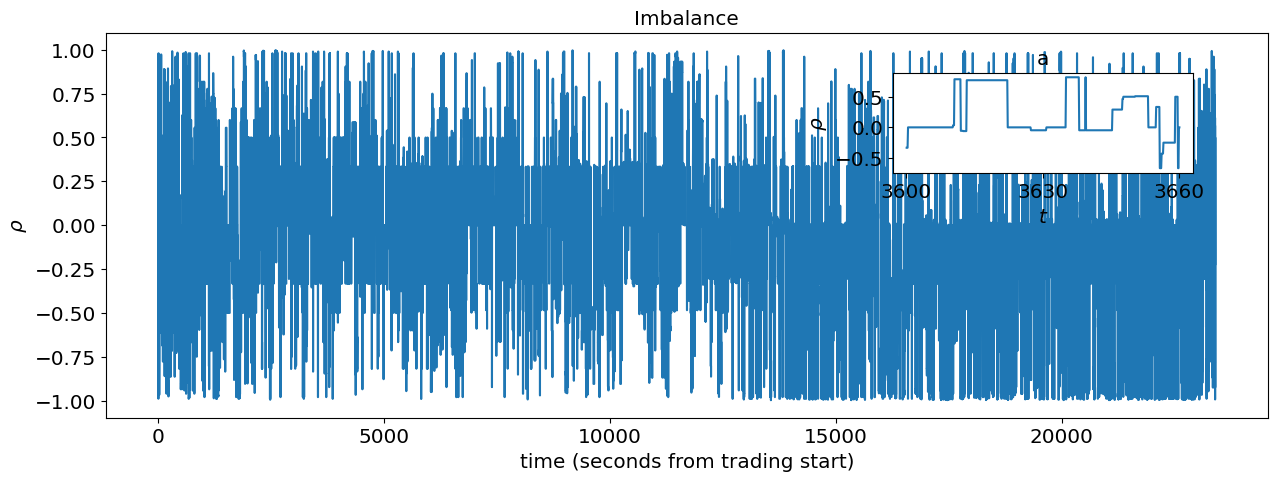

In [9]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

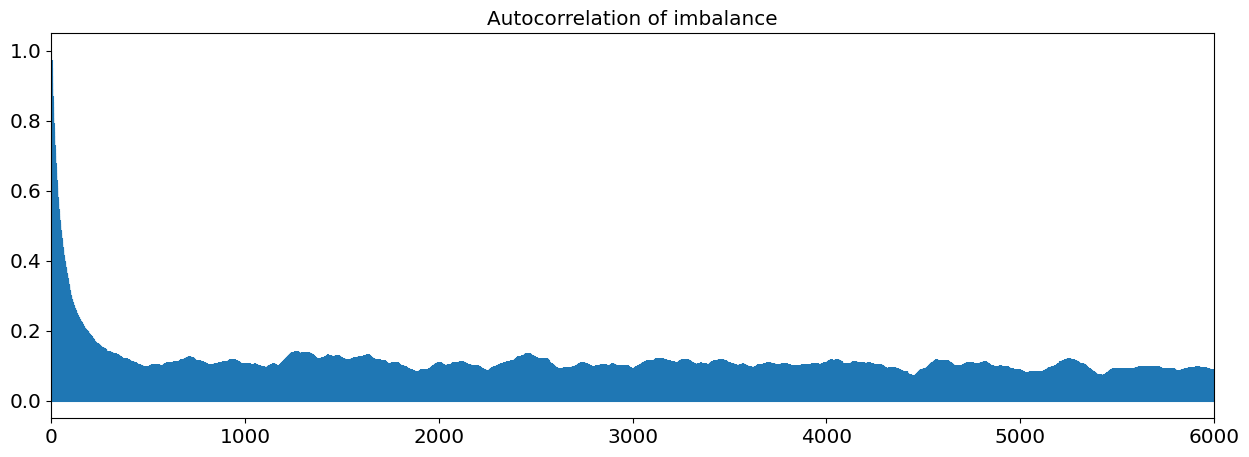

In [10]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

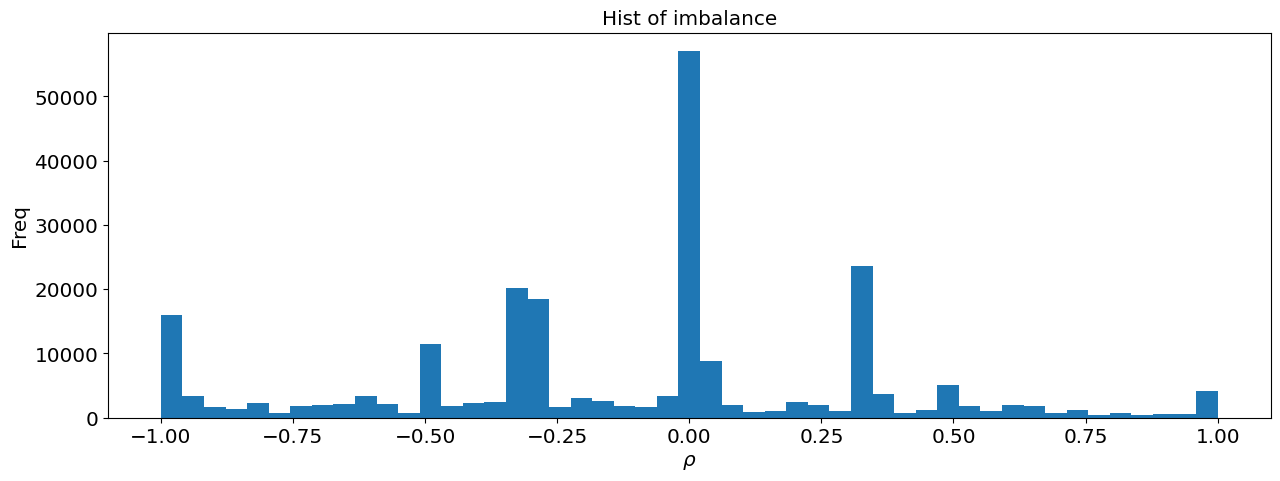

In [11]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [42]:
import pandas as pd

#mean sd min max medium first q second q third q

midprice_df = pd.DataFrame(midprice)

midprice_mean = midprice_df.mean()[0]
midprice_sd = midprice_df.std()[0]
midprice_min = midprice_df.min()[0]
midprice_max = midprice_df.max()[0]
midprice_median = midprice_df.median()[0]
midprice_q1 = midprice_df.quantile(0.25)[0]
midprice_q2 = midprice_df.quantile(0.5)[0]
midprice_q3 = midprice_df.quantile(0.75)[0]

In [43]:
midprice_table = pd.DataFrame([midprice_mean, midprice_sd, midprice_min, midprice_max, midprice_median, midprice_q1, midprice_q2, midprice_q3],
                  columns=['Values'],
                  index=['Mean','SD','Min','Max','Median','Q1','Q2','Q3'])

midprice_table

,Values
Mean,333.317250
SD,0.496787
Min,331.820000
Max,334.640000
Median,333.280000
Q1,332.955000
Q2,333.280000
Q3,333.750000


In [45]:
microprice_df = pd.DataFrame(microprice)

microprice_mean = microprice_df.mean()[0]
microprice_sd = microprice_df.std()[0]
microprice_min = microprice_df.min()[0]
microprice_max = microprice_df.max()[0]
microprice_median = microprice_df.median()[0]
microprice_q1 = microprice_df.quantile(0.25)[0]
microprice_q2 = microprice_df.quantile(0.5)[0]
microprice_q3 = microprice_df.quantile(0.75)[0]

microprice_table = pd.DataFrame([microprice_mean, microprice_sd, microprice_min, microprice_max, microprice_median, microprice_q1, microprice_q2, microprice_q3],
                  columns=['Values'],
                  index=['Mean','SD','Min','Max','Median','Q1','Q2','Q3'])

microprice_table

,Values
Mean,333.310818
SD,0.503138
Min,331.793333
Max,334.747076
Median,333.270000
Q1,332.945433
Q2,333.270000
Q3,333.745065


In [46]:
spread_df = pd.DataFrame(spread)

spread_mean = spread_df.mean()[0]
spread_sd = spread_df.std()[0]
spread_min = spread_df.min()[0]
spread_max = spread_df.max()[0]
spread_median = spread_df.median()[0]
spread_q1 = spread_df.quantile(0.25)[0]
spread_q2 = spread_df.quantile(0.5)[0]
spread_q3 = spread_df.quantile(0.75)[0]

spread_table = pd.DataFrame([spread_mean, spread_sd, spread_min, spread_max, spread_median, spread_q1, spread_q2, spread_q3],
                  columns=['Values'],
                  index=['Mean','SD','Min','Max','Median','Q1','Q2','Q3'])

spread_table

,Values
Mean,0.130978
SD,0.074723
Min,0.010000
Max,0.750000
Median,0.120000
Q1,0.090000
Q2,0.120000
Q3,0.150000


In [47]:
imbalance_df = pd.DataFrame(rho)

imbalance_mean = imbalance_df.mean()[0]
imbalance_sd = imbalance_df.std()[0]
imbalance_min = imbalance_df.min()[0]
imbalance_max = imbalance_df.max()[0]
imbalance_median = imbalance_df.median()[0]
imbalance_q1 = imbalance_df.quantile(0.25)[0]
imbalance_q2 = imbalance_df.quantile(0.5)[0]
imbalance_q3 = imbalance_df.quantile(0.75)[0]

imbalance_table = pd.DataFrame([imbalance_mean, imbalance_sd, imbalance_min, imbalance_max, imbalance_median, imbalance_q1, imbalance_q2, imbalance_q3],
                  columns=['Values'],
                  index=['Mean','SD','Min','Max','Median','Q1','Q2','Q3'])

imbalance_table

,Values
Mean,-0.118245
SD,0.449556
Min,-0.997740
Max,0.997537
Median,0.000000
Q1,-0.333333
Q2,0.000000
Q3,0.078341
